# Implementation of Perelson et al.

In this implementation we're going to evaluate the properties of a [dynamical model](http://science.sciencemag.org/content/271/5255/1582).

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:

P1array = ([[52000, 3.68, 0.50],[643000, 2.06, 0.53],[77000, 3.09,0.50]])
day1_u = np.arange(0, 1, 0.166667)
day2_u = np.arange(1, 2, 0.25)
daysrest_u = np.arange(2, 9, 1)
days_u = np.concatenate((day1_u, day2_u, daysrest_u))


VI_u = [[],[],[]] 
VNI_u = [[],[],[]] 

e = math.e
#print(e)
for j in range (0, np.size(P1array, axis = 1)):
    for i in range (0,np.size(days_u)):
        t = days_u[i]
        vinf = (P1array[j][0])*((e)**(-1*P1array[j][1]*(t)))
        VI_u[j].append(vinf)
        

for x in range (0, np.size(P1array, axis = 1)):
    for y in range (0,np.size(days_u)):
        T = days_u[y]
        vnotinf = ( (P1array[x][1]*P1array[x][0]) / (P1array[x][1]-P1array[x][2]) ) *  (  ((((P1array[x][1])/(P1array[x][1]-P1array[x][2])  )  * 
                                                                                           (e**(-1*P1array[x][2]*(T))-(e**(-1*P1array[x][1]*(T)))))  - (P1array[x][2]*(T)*(e**(-1*P1array[x][1]*(T))))))              
        VNI_u[x].append(vnotinf)

VT_u = np.zeros_like(VNI_u)


for a in range (0, np.size(P1array, axis = 1)):
    for b in range (0,np.size(days_u)):
        VT_u[a][b] = 2*(VI_u[a][b] + VNI_u[a][b])
        
#VI2 = 2*VNI
#print(VT[1])
#fig, axs = plt.subplots(2,2, figsize = (20,20))
#axs[0, 0].plot(days, VT[0][:])
#axs[0, 0].set_title('Patient 104')
#axs[0,0].semilogy()
#axs[0, 1].plot(days, VT[1][:], 'tab:orange')
#axs[0, 1].set_title('Patient 105')
#axs[0,1].semilogy()
#axs[1, 0].plot(days, VT[2][:], 'tab:green')
#axs[1, 0].set_title('Patient 107')
#axs[1,0].semilogy();


In [3]:
def VInfectious1(Vnought, c, offset):
    e = math.e
    day1 = np.arange(0, 1, 0.166667)
    day2 = np.arange(1, 2, 0.25)
    daysrest = np.arange(2, 9, 1)
    days = np.concatenate((day1, day2, daysrest))
    #print(np.size(days))
    VInf = []
    
    i = 0;
    for i in range (0,np.size(days)):
        t = days[i]
        vinf = (Vnought)*((e)**(-1*c*(t-offset)))
        VInf.append(vinf)
        
    #print(np.size(VInf)) 
    VINFECTIOUS = np.zeros_like(VInf)
    
    b = 0;
    for b in range (0,np.size(days)):
        VINFECTIOUS[b] = 2*(VInf[b])
    
    #print(VINFECTIOUS)
    
    return(VINFECTIOUS);


def VNotInfectious1(Vnought, c, delta, offset):
    e = math.e
    day1 = np.arange(0, 1, 0.166667)
    day2 = np.arange(1, 2, 0.25)
    daysrest = np.arange(2, 9, 1)
    days = np.concatenate((day1, day2, daysrest))
    VNIni = []
    
    y = 0;
    for y in range (0,np.size(days)):
        T = days[y]
        #if (T-0.166) >= 0:
        vnotinf = ( (c*Vnought) / (c-delta) ) *  (  (((c)/(c-delta)  )  *  ((e**(-1*delta*(T-offset)))-(e**(-1*c*(T-offset)))))  - (delta*(T-offset)*(e**(-1*c*(T-offset)))))              
        VNIni.append(vnotinf)
        #else:
            #vnotinf = 0
            #VNIni.append(vnotinf)
    #print(np.size(VNIni))
    VNotInfectious = np.zeros_like(VNIni)


    for b in range (0,np.size(days)):
        VNotInfectious[b] = 2*(VNIni[b])
        
    #print(VNotInfectious)   
    return(VNotInfectious);


def VSUM1(VI, VNI, offset):
    e = math.e
    day1 = np.arange(0, 1, 0.166667)
    day2 = np.arange(1, 2, 0.25)
    daysrest = np.arange(2, 9, 1)
    days = np.concatenate((day1, day2, daysrest))
    VT = []
    #print(np.size(days))
    for b in range (0,np.size(days)):
        #print(b)
        VT.append(VI[b] + VNI[b])
    
    VSUM = VT
    
    return(VSUM);



VI3 = VInfectious1(52000, 3.68, (2/24) );
VNI3 = VNotInfectious1(52000, 3.68, 0.50, (2/24) );
VS3 = VSUM1(VI3, VNI3, (2/24));
print(VS3)

[104080.17066554277, 103942.21835818337, 102856.90229987138, 100058.62342379111, 95815.87919484677, 90633.3674896077, 84969.26343806248, 76279.82788705821, 67932.13401042276, 60234.789279938814, 53286.344521126004, 32394.180614496225, 19650.70258246761, 11918.839400374243, 7229.144173912546, 4384.697664026818, 2659.4535691056426]


### (1) Reproduce all four panels from Figure 1 shown in Perelson et al. using eq. 6

Since we are not given any empirical data, use the fitted parameters and the appropriate constants to generate the curves shown on these plots. Remember to account for the time delays for each patient.

#### (i) Implement eq. 6 from the paper as a function.

In [4]:
def VInfectious(Vnought, c, offset):
    e = math.e
    day1 = np.arange(offset, 1, 0.166667)
    day2 = np.arange(1, 2, 0.25)
    daysrest = np.arange(2, 9, 1)
    days = np.concatenate((day1, day2, daysrest))
    #print(np.size(days))
    VInf = []
    
    i = 0;
    for i in range (0,np.size(days)):
        t = days[i]
        vinf = (Vnought)*((e)**(-1*c*(t-offset)))
        VInf.append(vinf)
        
    #print(np.size(VInf)) 
    VINFECTIOUS = np.zeros_like(VInf)
    #V2 = np.multiply(2,VInf)
    #print(VInf)
    #print(V2)
    b = 0;
    for b in range (0,np.size(days)):
        VINFECTIOUS[b] = 2*(VInf[b])
    
    #print(VINFECTIOUS)
    
    return(VINFECTIOUS);


def VNotInfectious(Vnought, c, delta, offset):
    e = math.e
    day1 = np.arange(offset, 1, 0.166667)
    day2 = np.arange(1, 2, 0.25)
    daysrest = np.arange(2, 9, 1)
    days = np.concatenate((day1, day2, daysrest))
    VNIni = []
    
    y = 0;
    for y in range (0,np.size(days)):
        T = days[y]
        #if (T-0.166) >= 0:
        vnotinf = ( (c*Vnought) / (c-delta) ) *  (  (((c)/(c-delta)  )  *  ((e**(-1*delta*(T-offset)))-(e**(-1*c*(T-offset)))))  - (delta*(T-offset)*(e**(-1*c*(T-offset)))))              
        VNIni.append(vnotinf)
        #else:
            #vnotinf = 0
            #VNIni.append(vnotinf)
    #print(np.size(VNIni))
    VNotInfectious = np.zeros_like(VNIni)


    for b in range (0,np.size(days)):
        VNotInfectious[b] = 2*(VNIni[b])
        
    #print(VNotInfectious)   
    return(VNotInfectious);


def VSUM(VI, VNI, offset):
    e = math.e
    day1 = np.arange(offset, 1, 0.166667)
    day2 = np.arange(1, 2, 0.25)
    daysrest = np.arange(2, 9, 1)
    days = np.concatenate((day1, day2, daysrest))
    VT = []
    #print(np.size(days))
    for b in range (0,np.size(days)):
        #print(b)
        VT.append(VI[b] + VNI[b])
    
    VSUM = VT
    
    return(VSUM);



VI2 = VInfectious(52000, 3.68, (4/24) );
VNI2 = VNotInfectious(52000, 3.68, 0.50, (4/24) );
VS2 = VSUM(VI2, VNI2, (4/24))
print(VS2)

print("The above code and previous code blocks implement Eq. 6. from the Perelson paper in various ways for ease of use later in the code, either seperately or all in one function")

[104000.0, 103605.13349296903, 101666.37751886371, 98086.97412339554, 93310.9435734877, 87837.43086652573, 79162.59480508279, 70651.98591056223, 62719.34154199777, 55518.214515435204, 33771.14729924504, 20486.735764872676, 12425.9477716224, 7536.721844753449, 4571.252978624523, 2772.605087933049]
The above code and previous code blocks implement Eq. 6. from the Perelson paper in various ways for ease of use later in the code, either seperately or all in one function


#### (ii) Make the plot from this function's values over time.

Note that some constants are given in other papers published by this lab. An estimate of k, the viral infectivity rate, can be found in Wein et al. (J. Theor. Biol. 192:81-98) to be $3.43\times10^{-8}$ mL/(virion•day). Note that you will need to solve ordinary differential equations for $T^*$, $V_I$, and $V_{NI}$ to reproduce the data in Figure 1.

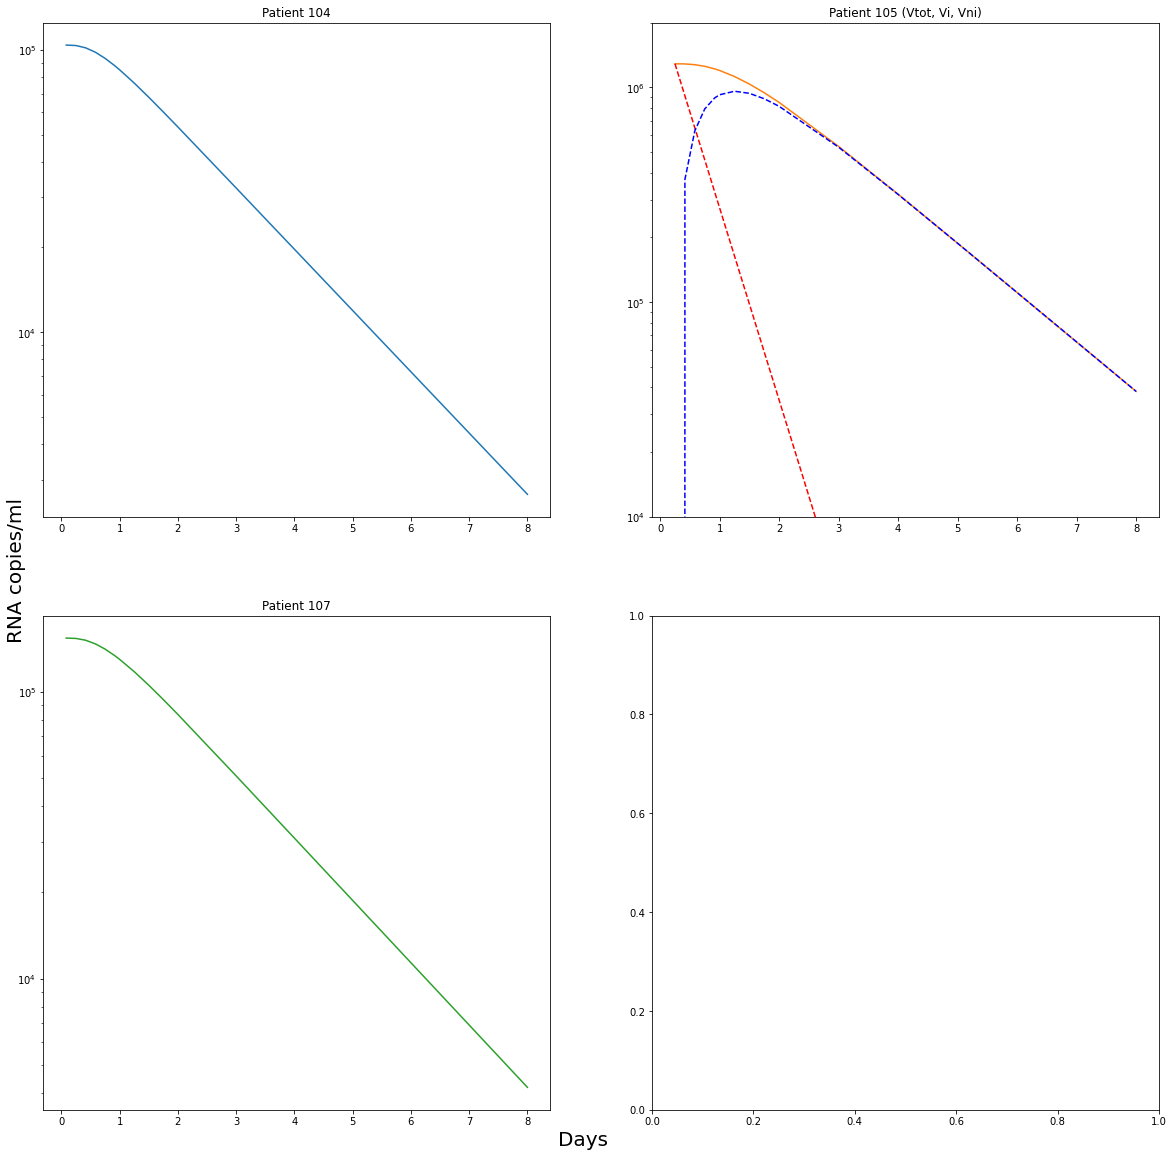

In [5]:


def VTotal(ValuesArray, offsetarray):
    
    days = np.empty((3,0), dtype= object)
    days = np.ndarray.tolist(days)
    
    for ab in range(0, np.size(ValuesArray, axis = 0)):
        day1 = np.arange(offsetarray[ab], 1, 0.166667)
        day2 = np.arange(1, 2, 0.25)
        daysrest = np.arange(2, 9, 1)
        time_vals = np.concatenate((day1, day2, daysrest))
        days[ab] = time_vals

    
    VI = np.empty((3,0), dtype= object)
    VI = np.ndarray.tolist(VI)
    
    VNI = np.empty((3,0), dtype= object)
    VNI = np.ndarray.tolist(VNI)

    e = math.e
    #print(e)
    j = 0
    i = 0
    for j in range (0, np.size(P1array, axis = 1)):
        for i in range (0,np.size(days[j], axis = 0)):
            t = days[j][i]
            #print(t)
            vinf = 2*((P1array[j][0])*((e)**(-1*P1array[j][1]*(t-offsetarray[j]))))
            VI[j].append(vinf)
    x=0
    y=0
    for x in range (0, np.size(P1array, axis = 1)):
        for y in range (0,np.size(days[x], axis = 0)):
            T = days[x][y]
            vnotinf = 2*(( (P1array[x][1]*P1array[x][0]) / (P1array[x][1]-P1array[x][2]) ) *  (  ((((P1array[x][1])/(P1array[x][1]-P1array[x][2])  )  * 
                                                                                               (e**(-1*P1array[x][2]*(T-offsetarray[x]))-(e**(-1*P1array[x][1]*(T-offsetarray[x])))))  - 
                                            (P1array[x][2]*(T-offsetarray[x])*(e**(-1*P1array[x][1]*(T-offsetarray[x])))))))              
            VNI[x].append(vnotinf)

    
    VT = np.empty((3,0), dtype= object)
    VT = np.ndarray.tolist(VT)
    a=0
    b=0
    for a in range (0, np.size(P1array, axis = 1)):
        #print(0,np.size(days[a], axis = 0))
        for b in range (0,np.size(days[a], axis = 0)):
            #print(b)
            VT[a].append(VI[a][b] + VNI[a][b])
    
    
    
    return(VT, VI, VNI, days);

P1array = ([[52000, 3.68, 0.50],[643000, 2.06, 0.53],[77000, 3.09,0.50]])
offset = ([2/24, 6/24, 2/24])
offset2 = ([0, 0, 0])

VT, VIT, VNIT, days = VTotal(P1array, offset)
#print(VT[1])

fig, axs = plt.subplots(2,2, figsize = (20,20))
axs[0, 0].plot(days[0], VT[0])
axs[0, 0].set_title('Patient 104')
axs[0,0].semilogy()
axs[0, 1].plot(days[1], VT[1], 'tab:orange')
axs[0, 1].set_title('Patient 105 (Vtot, Vi, Vni)')
axs[0, 1].plot(days[1], VIT[1], 'r--')
axs[0, 1].plot(days[1], VNIT[1], 'b--')
axs[0,1].semilogy()
axs[0,1].set_ylim(10e3, 20e5)
axs[1, 0].plot(days[2], VT[2], 'tab:green')
axs[1, 0].set_title('Patient 107')
axs[1,0].semilogy();
fig.text(0.5, 0.1, 'Days', ha='center', fontsize = 20)
fig.text(0.1, 0.5, 'RNA copies/ml', va='center', rotation='vertical', fontsize=20);


#axs[1, 1].plot(days[1], VIT[1], 'r--')
#axs[1,1].semilogy()
#axs[1,1].set_ylim(10e3, 20e5)
#axs[1, 1].set_title('Patient 105 (Vi)');

# Answer





### (2) Can the model of virion production before treatment show stable or unstable oscillations?

Justify your answer.

Answer.
The following functions: $ \frac{dT^*}{dt}$ and $\frac{dV}{dt} $, are the functions to be used in the jacobian to calculate the rate of change dependent on the two variables: $T^*$ and $V$ 
the first row of the jacobian will have the derivative taken in respect to $T^*$ and the second row will have the derivative wrt $V$ 

$ \frac{dT^*}{dt} = kVT - \delta T^* $

$ \frac{dV}{dt} = \delta NT^* - cV $

Jacobian Matix = $$ \begin{pmatrix} -\delta & kT\\ N\delta & -c\end{pmatrix} $$

eigenvalues are equal to the following equation:
where $\lambda = $ eigenvalues, $\tau = $ trace of the jacobian, and $\Delta = $ determinant of the Jacobian
$$ \lambda =  \tau \pm \frac{\sqrt{\tau^2 - 4\Delta}}{2}$$

The system can only have stable or unstable oscillations if ${\tau^2 - 4\Delta} < 0 $, (only situation where imaginary numbers would be present)

Trace of matrix: $$\tau = \delta*c$$

Determinant of matrix: $$\Delta = \delta*c - ((N\delta)*(kT))$$

If $(\delta*c)^2 < 4(\delta*c - ((N\delta)*(kT))$ then unstable oscillations could occur, otherwise they could not occur, 
if we assume we are at a steady state before then N = c/KT and therefore the right hand side of the inequality is equal to 0 and because c and $\delta$ are always 
positive, the inequality is invalid and thus $ {\tau^2 - 4\Delta}$ is always positive and the eigenvalues are only real, and thus, there can't be oscillations.

Because the eigenvalues have no imaginary component, there are no oscillations before treatment.


 



In [19]:
Nnought_array = []
k = 3.43*(10**-8)
P1array_T = ([[52000, 3.68, 0.50, 2],[643000, 2.06, 0.53, 11],[77000, 3.09,0.50, 412]]) #V, c, delta, T
for co in range (0, np.size(P1array_T, axis = 0)):
        Nnought = P1array_T[co][1] / (k*P1array_T[co][3])
        Nnought_array.append(Nnought)

#print(Nnought_array)      


lsa = []
rsa = []
for ad in range (0, np.size(P1array_T, axis = 0)):
    #print('c = ', P1array_T[ad][1], P1array_T[ad][2], P1array_T[ad][3], Nnought_array[ad], k)
    ls = (P1array_T[ad][1]*P1array_T[ad][2])**2
    rs = 4*((P1array_T[ad][2]*P1array_T[ad][1])-(Nnought_array[ad]*P1array_T[ad][2]*P1array_T[ad][3]*k))
    lsa.append(ls)
    rsa.append(rs)
            
print(lsa < rsa)
print(lsa > rsa)
print("Proof that the eigenvalues cannot have imaginary components")

False
True
Proof that the eigenvalues cannot have imaginary components


### (3) Reimplement the model relaxing the assumption about T remaining constant by numerically solving the system of ODEs.

#### i. Define a function that takes each parameter as a vector and outputs the time derivative of each species.

In [20]:
# Answer
from scipy.integrate import odeint

def sys_der(IniR, timein, Nini, ccon, kcon, Tini, deltacon):
        dTstar_dt = (kcon*IniR[2]*Tini) - (deltacon * IniR[0]) 
        dVNI_dt = (Nini*deltacon*IniR[0]) - (ccon*IniR[1]) 
        dVI_dt = (-ccon*IniR[2]) 
        return[dTstar_dt, dVNI_dt, dVI_dt]



#def dVI_dt(VIin, cin, Tin, deltain, Tstarin, time): #VIin is a vector, and dVI_dt will be a vector as such
    #return(cin*-VIin)

#Vnought = P1array[0][0]
#c = P1array[0][1]


#D_VI = odeint(dVI_dt, Vnought, time , args = (c,))


#def dTstar_dt(kin,VIin, Tin, deltain, Tstarin, time):
   # return (kin*VIin*Tin) - (deltain * Tstarin)

#def dVNI_dt(Nin, deltain, Tstarin, cin, VNIin, time):
    #return(Nin*deltain*Tstarin - cin*VNIin)

#VIcalc = np.zeros(np.size(time))
#for ti in range(0, np.size(time)):
   #VIcalc[ti] = 52000*e**(-3.68*time[ti])
                   
#plt.plot(time, D_VI)
#plt.plot(time, VIcalc)
#print(Vnought)
#print(D_VI)
#print(VIcalc)


#### ii. Use odeint to solve this system of equations numerically for patient 105.

Hint: For ease later, it may be helpful to make a function here that handles everything but takes in gnu.

In [21]:
# Answer
def deriv_sol(P1array, offsetarray):

    
    time = np.empty((3,0), dtype= object)
    time = np.ndarray.tolist(time)
    for ab in range(0, np.size(P1array, axis = 0)):
        day1 = np.arange(offsetarray[ab], 1, 0.166667)
        day2 = np.arange(1, 2, 0.25)
        daysrest = np.arange(2, 9, 1)
        time_vals = np.concatenate((day1, day2, daysrest))
        time[ab] = time_vals

    # [104,105,107] [V,c,delta,T]

    VNInought = 0
    k = 3.43*(10**-8)

    
    Nnought_array = np.empty((0,0), dtype= object)
    Nnought_array = np.ndarray.tolist(Nnought_array)#[104,105,107]
    for co in range (0, np.size(P1array, axis = 0)):
        Nnought = P1array[co][1] / (k*P1array[co][3])
        Nnought_array.append(Nnought)

    
    Tstar_nought_array = np.empty((0,0), dtype= object)
    Tstar_nought_array = np.ndarray.tolist(Tstar_nought_array)
    for ca in range (0, np.size(P1array, axis = 0)):
        Tstar_nought = (k*P1array[ca][0]*P1array[ca][3]) / (P1array[ca][2])
        Tstar_nought_array.append(Tstar_nought)

    
    ini_for_rates = np.empty((3,0), dtype= object)
    ini_for_rates= np.ndarray.tolist(ini_for_rates)
    for cb in range (0, np.size(P1array, axis = 0)):
        ini_for_rates[cb].append(Tstar_nought_array[cb])
        ini_for_rates[cb].append(0)
        ini_for_rates[cb].append(P1array[cb][0])

    
    SUB_VT = np.empty((0,0), dtype= object)
    SUB_VT = np.ndarray.tolist(SUB_VT)
    for cd in range(0, np.size(P1array, axis = 0)):
        Vt = odeint(sys_der, ini_for_rates[cd], time[cd], args = ( Nnought_array[cd], P1array[cd][1],  k, 
                                                                        P1array[cd][3],  P1array[cd][2])) 
        SUB_VT.append(Vt)
    
    #print(SUB_VT)
    #VTOTO_array = 
    #print(VTOTO_array)
    Vtot_array = np.empty((3,0), dtype= object)
    Vtot_array = np.ndarray.tolist(Vtot_array)
    
    VNI_dv_a = np.empty((3,0), dtype= object)
    VNI_dv_a = np.ndarray.tolist(VNI_dv_a)
    
    VI_dv_a = np.empty((3,0), dtype= object)
    VI_dv_a = np.ndarray.tolist(VI_dv_a)
    
    Tstar_tot = np.empty((3,0), dtype= object)
    Tstar_tot = np.ndarray.tolist(Tstar_tot)

    #print(SUB_VT)
    for ce in range(0, np.size(SUB_VT, axis = 0)):
        for cc in range(0, np.size(SUB_VT[ce], axis = 0)):
            Tstar = SUB_VT[ce][cc][0]
            V_total = 2*(SUB_VT[ce][cc][1]+SUB_VT[ce][cc][2])
            VNI_dv = 2*(SUB_VT[ce][cc][1])
            VI_dv = 2*(SUB_VT[ce][cc][2])
            Tstar_tot[ce].append(Tstar)
            Vtot_array[ce].append(V_total)
            VNI_dv_a[ce].append(VNI_dv)
            VI_dv_a[ce].append(VI_dv)
    
            
    return(Vtot_array, time, VNI_dv_a, VI_dv_a, Tstar_tot );

P1array_T = ([[52000, 3.68, 0.50, 2],[643000, 2.06, 0.53, 11],[77000, 3.09,0.50, 412]])
offset = ([2/24, 6/24, 2/24])
offset2 = ([0, 0, 0])
DV_VT, time, VNI_A, VI_A ,Tstar_A= deriv_sol(P1array_T, offset);

print("Vtot for patient 105 = " , DV_VT[1])
print()
print("Tstar for patent 105 = ", Tstar_A[1]);
print()
print("VI for patient 105 = ", VI_A[1]);
print()
print("VNI for patient 105 = ", VNI_A[1]);
    
#print("Solution for Vtotal of 




Vtot for patient 105 =  [1286000.0, 1284157.0239842287, 1273767.4200859005, 1251585.7283722102, 1217681.983924983, 1196825.5810665884, 1122010.897194862, 1034953.7767926966, 942561.3512885608, 850033.8169805778, 530393.8749290794, 317490.12176647864, 187738.37085859914, 110637.43833027004, 65141.82277201778, 38345.74644205584]

Tstar for patent 105 =  [0.45774320754716985, 0.45171646748651717, 0.43670454316356705, 0.4162262340966214, 0.39270103834621417, 0.3803338865749698, 0.3425521701571927, 0.30566887626521827, 0.27109805821948296, 0.23946425772475138, 0.142937859048306, 0.08438731356972631, 0.04970308635371124, 0.029259599661401167, 0.017222870375284877, 0.010137533957875524]

VI for patient 105 =  [1286000.0, 912289.9675309126, 647179.6129421473, 459110.0023120495, 325693.1913103198, 274319.05978602817, 163905.79837530106, 97933.81371091469, 58515.512234687114, 34963.05360843309, 4456.180125930074, 567.9578657310028, 72.38848699054087, 9.226200338016605, 1.1759159056544035, 0.1498

#### iii. Reproduce the subpanels of Fig. 1 with this updated model. 

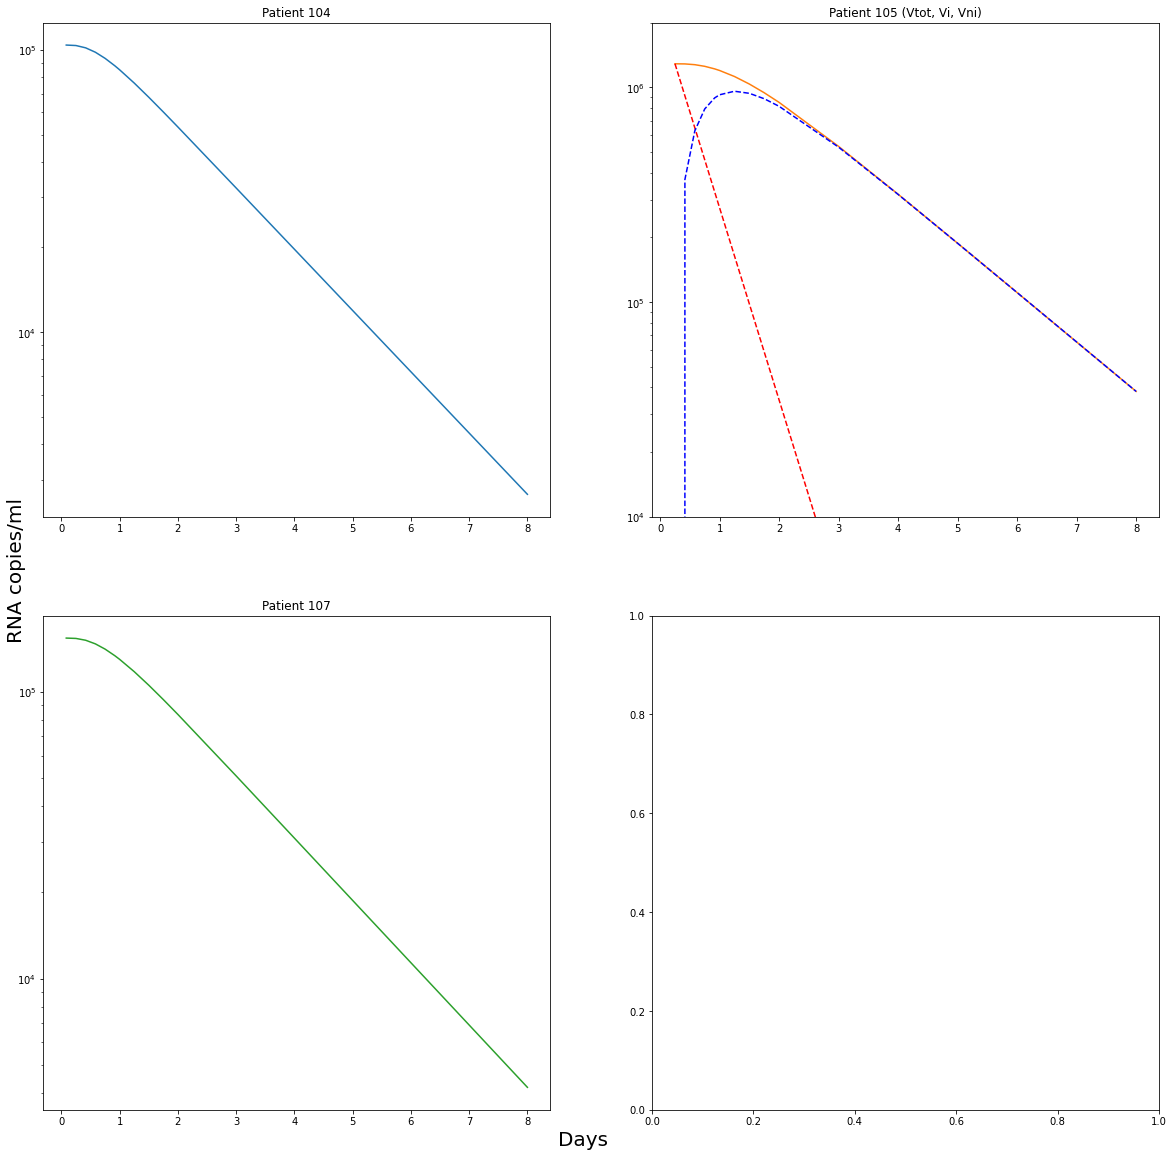

In [22]:
# Answer
P1array_T = ([[52000, 3.68, 0.50, 2],[643000, 2.06, 0.53, 11],[77000, 3.09,0.50, 412]])
offset = ([2/24, 6/24, 2/24])
offset2 = ([0, 0, 0])
DV_VT, time, VNI_A, VI_A, Tstar_A = deriv_sol(P1array_T, offset)

fig, axs = plt.subplots(2,2, figsize = (20,20))
axs[0, 0].plot(time[0], DV_VT[0])
axs[0, 0].set_title('Patient 104')
axs[0,0].semilogy()

axs[0, 1].plot(time[1], DV_VT[1], 'tab:orange')
axs[0, 1].set_title('Patient 105 (Vtot, Vi, Vni)')
axs[0, 1].plot(time[1], VI_A[1], 'r--')
axs[0, 1].plot(time[1], VNI_A[1], 'b--')
axs[0,1].semilogy()
axs[0,1].set_ylim(10e3, 20e5)

axs[1, 0].plot(time[2], DV_VT[2], 'tab:green')
axs[1, 0].set_title('Patient 107')
axs[1,0].semilogy();

fig.text(0.5, 0.1, 'Days', ha='center', fontsize = 20)
fig.text(0.1, 0.5, 'RNA copies/ml', va='center', rotation='vertical', fontsize=20);
#axs[1, 1].set_title('Patient 105 (Vi)')
#axs[1, 1].plot(time[1], VI_A[1], 'r--')
#axs[1,1].semilogy()
#axs[1,1].set_ylim(10e3, 20e5);




#### iv. Are the results the same as in (1)?

Show evidence of your conclusion.

In [24]:
# Answer
P1array_T = ([[52000, 3.68, 0.50, 2],[643000, 2.06, 0.53, 11],[77000, 3.09,0.50, 412]])
offset = ([2/24, 6/24, 2/24])
offset2 = ([0, 0, 0])
DV_VT, time, VNI_A, VI_A, Tstar_A = deriv_sol(P1array_T, offset);

#print("Vtot for patient 105 = " , DV_VT[1])
P1array = ([[52000, 3.68, 0.50],[643000, 2.06, 0.53],[77000, 3.09,0.50]])
offset = ([2/24, 6/24, 2/24])
VT, VIT, VNIT, days = VTotal(P1array, offset);
#print(VT[1])


rnd_sub_105_dVdt = np.round(DV_VT[1], 1);
rnd_sub_105_V = np.round(VT[1], 1)
print(rnd_sub_105_dVdt)
print()
print(rnd_sub_105_V)
print()
print("This comparison shows that up to 1 decimal point that the values from both ways of calculating the Vtotal are the same for each timepoint if it returns true in the array in that position.")
print()
print(rnd_sub_105_dVdt == rnd_sub_105_V)



[1286000.  1284157.  1273767.4 1251585.7 1217682.  1196825.6 1122010.9
 1034953.8  942561.4  850033.8  530393.9  317490.1  187738.4  110637.4
   65141.8   38345.7]

[1286000.  1284157.  1273767.4 1251585.7 1217682.  1196825.6 1122010.9
 1034953.8  942561.4  850033.8  530393.9  317490.1  187738.4  110637.4
   65141.8   38345.7]

This comparison shows that up to 1 decimal point that the values from both ways of calculating the Vtotal are the same for each timepoint if it returns true in the array in that position.

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


### (4) Repeat the work that the authors describe in item 12 of their “References and Notes”.

#### (i) Namely, vary the effectiveness factor of the drug (η=1.0, 0.99, 0.95, and 0.90) and simulate the viral load that would result from the modified differential equations using the parameters c=3.0 days$^{-1}$ and δ=0.5 days$^{-1}$ as described in item 12 and the values of T0, V0, and the time delay provided for patient 105.

Blue dots are original data


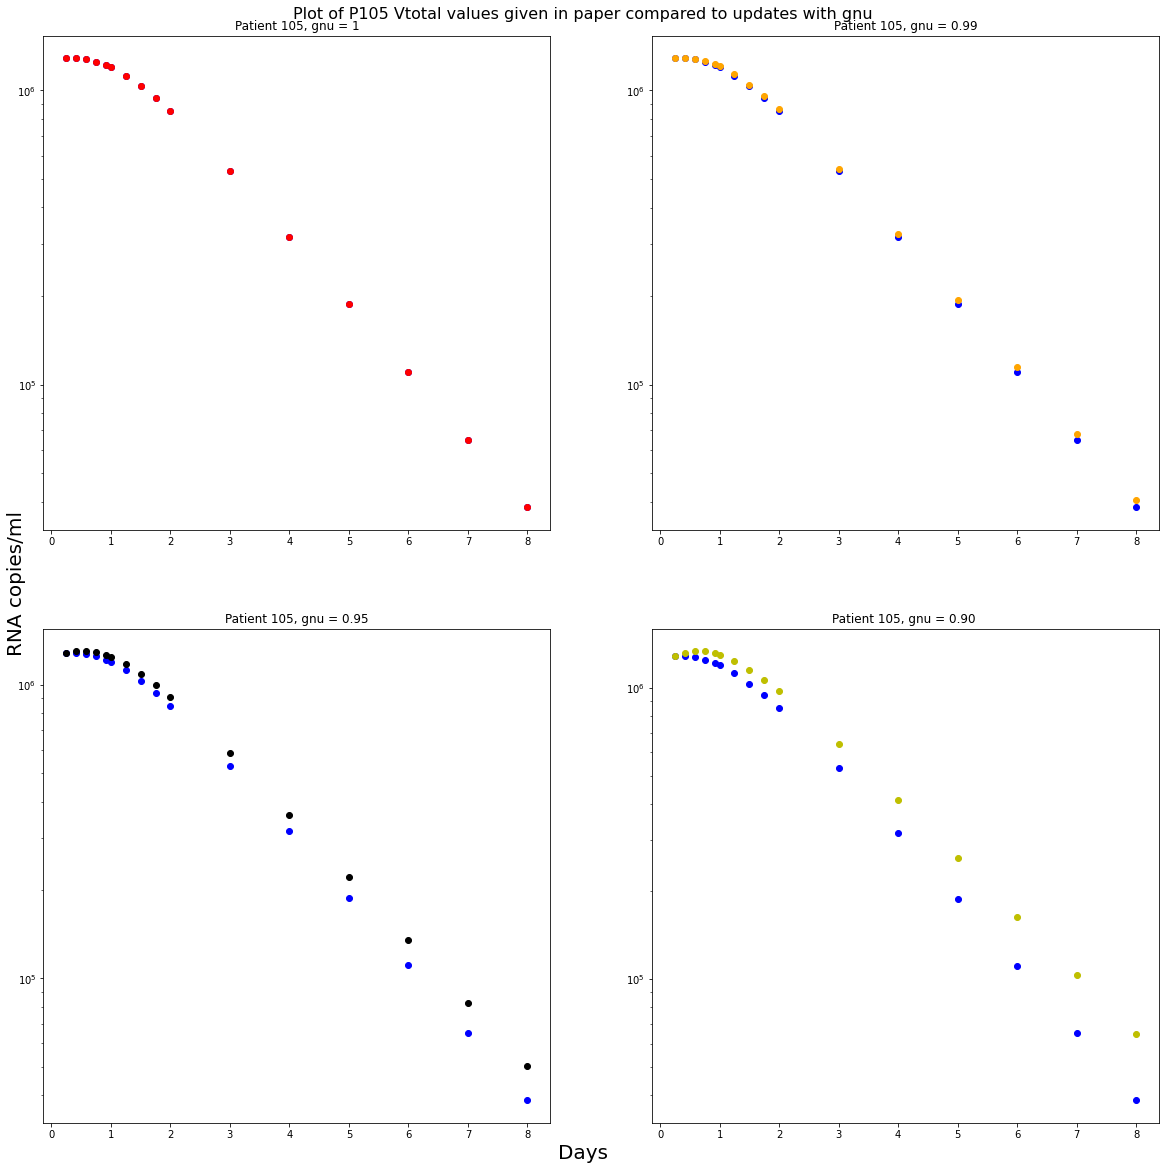

In [35]:
# Answer
def sys_der_var(IniR, timein, Nini, ccon, kcon, Tini, deltacon, gnu):
        dTstar_dt = (kcon*IniR[2]*Tini) - (deltacon * IniR[0]) 
        dVNI_dt = (Nini*deltacon*IniR[0]) - (ccon*IniR[1]) 
        dVI_dt = (-ccon*IniR[2]) + ((1 -gnu)*(Nini*deltacon*IniR[0]))
        return[dTstar_dt, dVNI_dt, dVI_dt]
    
def deriv_sol_var(P1array, offsetarray, gnu):

    
    time = np.empty((3,0), dtype= object)
    time = np.ndarray.tolist(time)
    
    for ab in range(0, np.size(P1array, axis = 0)):
        day1 = np.arange(offsetarray[ab], 1, 0.166667)
        day2 = np.arange(1, 2, 0.25)
        daysrest = np.arange(2, 9, 1)
        time_vals = np.concatenate((day1, day2, daysrest))
        time[ab] = time_vals

    # [104,105,107] [V,c,delta,T]

    VNInought = 0
    k = 3.43*(10**-8)

    Nnought_array = [] #[104,105,107]
    
    for co in range (0, np.size(P1array, axis = 0)):
        Nnought = P1array[co][1] / (k*P1array[co][3])
        Nnought_array.append(Nnought)

    Tstar_nought_array = []
    for ca in range (0, np.size(P1array, axis = 0)):
        Tstar_nought = (k*P1array[ca][0]*P1array[ca][3]) / (P1array[ca][2])
        Tstar_nought_array.append(Tstar_nought)

    
    ini_for_rates = np.empty((12,0), dtype= object)
    ini_for_rates = np.ndarray.tolist(ini_for_rates)
    for cb in range (0, np.size(P1array, axis = 0)):
        ini_for_rates[cb].append(Tstar_nought_array[cb])
        ini_for_rates[cb].append(0)
        ini_for_rates[cb].append(P1array[cb][0])

    SUB_VT = np.empty((0,0), dtype= object)
    SUB_VT = np.ndarray.tolist(SUB_VT)
    
    for cd in range(0, np.size(P1array, axis = 0)):
        for de in range(0, np.size(gnu)):
            Vt = odeint(sys_der_var, ini_for_rates[cd], time[cd], args = ( Nnought_array[cd], P1array[cd][1],  k, 
                                                                        P1array[cd][3],  P1array[cd][2], gnu[de])) 
            SUB_VT.append(Vt)

    #print(SUB_VT)
    Vtot_array = np.empty((12,0), dtype= object)
    Vtot_array = np.ndarray.tolist(Vtot_array)
    VNI_dv_a = np.empty((12,0), dtype= object)
    VNI_dv_a = np.ndarray.tolist(VNI_dv_a)
    VI_dv_a = np.empty((12,0), dtype= object)
    VI_dv_a = np.ndarray.tolist(VI_dv_a)

    
    for ce in range(0, np.size(SUB_VT, axis = 0)):
        for cc in range(0, np.size(SUB_VT[ce], axis = 0)):
            V_total = 2*(SUB_VT[ce][cc][1]+SUB_VT[ce][cc][2])
            VNI_dv = 2*(SUB_VT[ce][cc][1])
            VI_dv = 2*(SUB_VT[ce][cc][2])
            Vtot_array[ce].append(V_total)
            VNI_dv_a[ce].append(VNI_dv)
            VI_dv_a[ce].append(VI_dv)
            
    return(Vtot_array, time, VNI_dv_a, VI_dv_a )

P1array_T_var = ([[52000, 3.68, 0.50, 2],[643000, 2.06, 0.53, 11],[77000, 3.09,0.50, 412]])
gnu = ([1, 0.99, 0.95, 0.90])
offset = ([2/24, 6/24, 2/24])
offset2 = ([0, 0, 0])
DV_VT_gnu, time, VNI_A_gnu, VI_A_gnu = deriv_sol_var(P1array_T_var, offset, gnu)

fig, axs = plt.subplots(2,2, figsize = (20,20))
axs[0, 0].scatter(time[1], VT[1], c = "blue")
axs[0, 0].scatter(time[1], DV_VT_gnu[4], c = "red")
axs[0, 0].set_title('Patient 105, gnu = 1')
axs[0,0].semilogy()

axs[0, 1].scatter(time[1], VT[1], c = "blue")
axs[0, 1].scatter(time[1], DV_VT_gnu[5], c = "orange")
axs[0, 1].set_title('Patient 105, gnu = 0.99')
axs[0,1].semilogy()

axs[1, 0].scatter(time[1], VT[1], c = "blue")
axs[1, 0].scatter(time[1], DV_VT_gnu[6], c = "k")
axs[1, 0].set_title('Patient 105, gnu = 0.95')
axs[1,0].semilogy();

axs[1, 1].scatter(time[1], VT[1], c = "blue")
axs[1, 1].set_title('Patient 105, gnu = 0.90 ')
axs[1, 1].scatter(time[1], DV_VT_gnu[7], c = "y")
axs[1,1].semilogy();

fig.text(0.5, 0.1, 'Days', ha='center', fontsize = 20)
fig.text(0.1, 0.5, 'RNA copies/ml', va='center', rotation='vertical', fontsize=20);
fig.suptitle("Plot of P105 Vtotal values given in paper compared to updates with gnu",x = 0.5, y = 0.9, fontsize=16);
print("Blue dots are original data")

Blue dots are original data


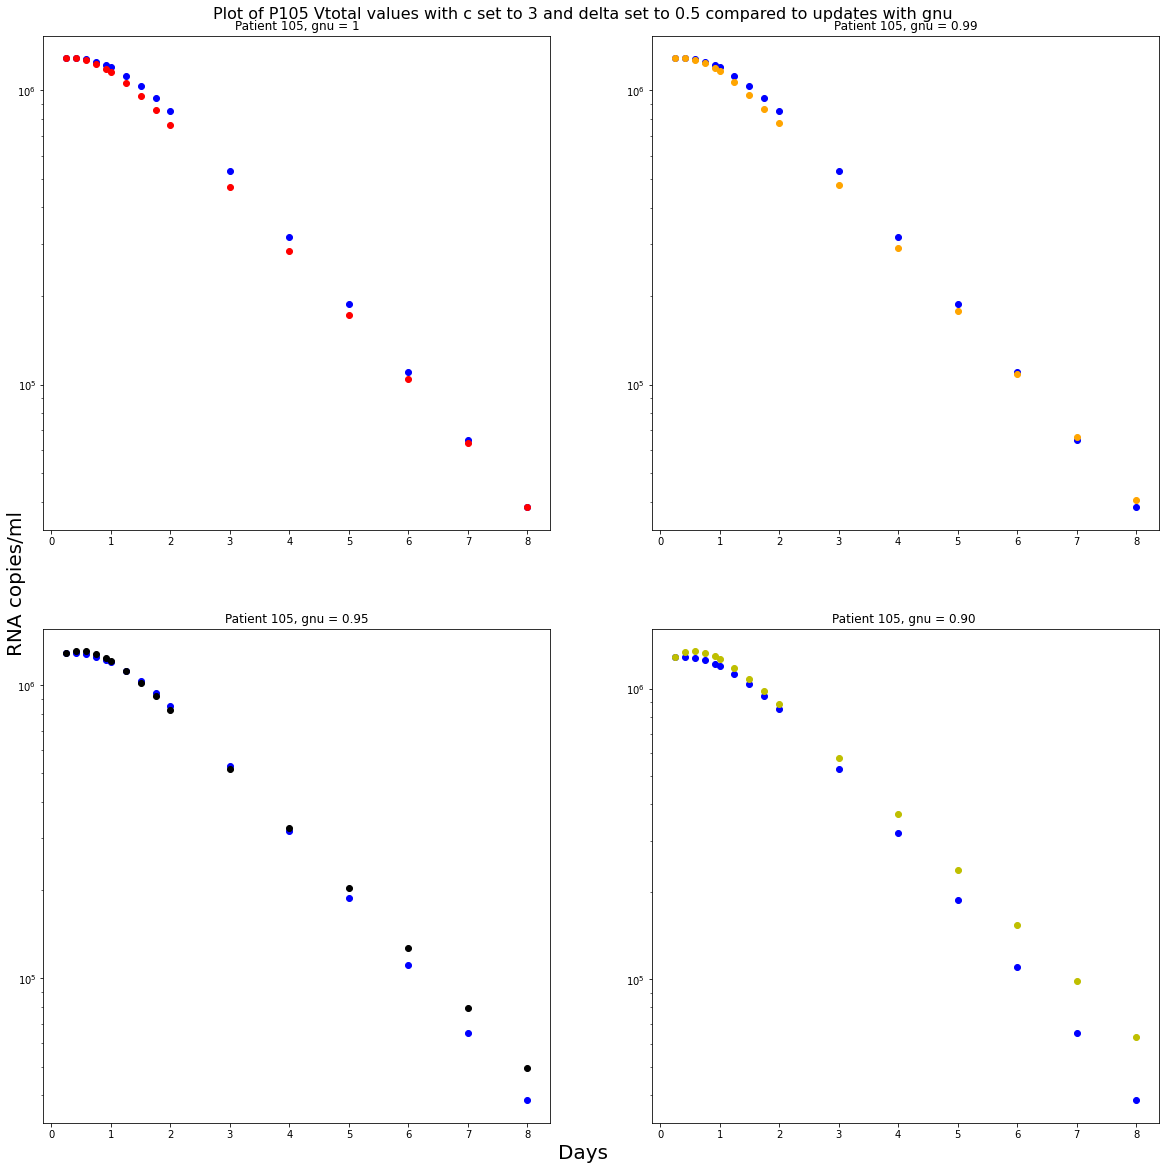

In [36]:
P1array_T_var_c = ([[52000, 3, 0.50, 2],[643000, 3, 0.5, 11],[77000, 3,0.5, 412]])
gnu = ([1, 0.99, 0.95, 0.90])
offset = ([2/24, 6/24, 2/24])
offset2 = ([0, 0, 0])
DV_VT_gnu_c, time, VNI_A_gnu_c, VI_A_gnu_c = deriv_sol_var(P1array_T_var_c, offset, gnu)

fig, axs = plt.subplots(2,2, figsize = (20,20))
axs[0, 0].scatter(time[1], VT[1], c = "blue")
axs[0, 0].scatter(time[1], DV_VT_gnu_c[4], c = "red")
axs[0, 0].set_title('Patient 105, gnu = 1')
axs[0,0].semilogy()

axs[0, 1].scatter(time[1], VT[1], c = "blue")
axs[0, 1].scatter(time[1], DV_VT_gnu_c[5], c = "orange")
axs[0, 1].set_title('Patient 105, gnu = 0.99')
axs[0,1].semilogy()

axs[1, 0].scatter(time[1], VT[1], c = "blue")
axs[1, 0].scatter(time[1], DV_VT_gnu_c[6], c = "k")
axs[1, 0].set_title('Patient 105, gnu = 0.95')
axs[1,0].semilogy();

axs[1, 1].scatter(time[1], VT[1], c = "blue")
axs[1, 1].set_title('Patient 105, gnu = 0.90 ')
axs[1, 1].scatter(time[1], DV_VT_gnu_c[7], c = "y")
axs[1,1].semilogy();
fig.text(0.5, 0.1, 'Days', ha='center', fontsize = 20)
fig.text(0.1, 0.5, 'RNA copies/ml', va='center', rotation='vertical', fontsize=20);
fig.suptitle("Plot of P105 Vtotal values with c set to 3 and delta set to 0.5 compared to updates with gnu",x = 0.5, y = 0.9, fontsize=16); 
print("Blue dots are original data")

#### (ii) Then, use the function `scipy.optimize.leastsq` to fit this data to the equation for V(t) given in the paper and find the estimates of c and δ that result. Fit only the portion of the curve after the pharmacokinetic delay. Compare these estimates to the actual values for c and δ and discuss the consequences of an imperfect drug on clearance time estimates.

In [37]:
# Answer
from scipy.optimize import least_squares


P1array_T_var_c_t = ([[52000, 3, 0.50, 2],[643000, 3, 0.5, 11],[77000, 3, 0.5, 412]])
gnu = ([1, 0.99, 0.95, 0.90])
offset = ([2/24, 6/24, 2/24])
offset2 = ([0, 0, 0])
DV_VT_gnu_c_t, time, VNI_A_gnu_c_t, VI_A_gnu_c_t = deriv_sol_var(P1array_T_var_c_t, offset, gnu)
#print(DV_VT_gnu_c_t)

P1array = ([[52000, 3.68, 0.50],[643000, 2.06, 0.53],[77000, 3.09,0.50]])
offset = ([2/24, 6/24, 2/24])
offset2 = ([0, 0, 0])
VT_Eq6, VIT_Eq6, VNIT_Eq6, days_Eq6 = VTotal(P1array, offset)
#print(VT_Eq6[1])

initials = ([3, 0.5])

def residuals_1(ini):
    VI_F = VInfectious(643000, ini[0], (6/24) );
    VNI_F = VNotInfectious(643000, ini[0], ini[1], (6/24) );
    VSF = VSUM(VI_F, VNI_F, (6/24));
    residuals_a = np.subtract(VSF,DV_VT_gnu_c_t[4])
    return(residuals_a)
   
def residuals_2(ini):
    VI_F = VInfectious(643000, ini[0], (6/24) );
    VNI_F = VNotInfectious(643000, ini[0], ini[1], (6/24) );
    VSF = VSUM(VI_F, VNI_F, (6/24));
    residuals_b = np.subtract(VSF,DV_VT_gnu_c_t[5])
    return(residuals_b)

def residuals_3(ini):
    VI_F = VInfectious(643000, ini[0], (6/24) );
    VNI_F = VNotInfectious(643000, ini[0], ini[1], (6/24) );
    VSF = VSUM(VI_F, VNI_F, (6/24));
    residuals_c = np.subtract(VSF,DV_VT_gnu_c_t[6])
    return(residuals_c)

def residuals_4(ini):
    VI_F = VInfectious(643000, ini[0], (6/24) );
    VNI_F = VNotInfectious(643000, ini[0], ini[1], (6/24) );
    VSF = VSUM(VI_F, VNI_F, (6/24));
    residuals_d = np.subtract(VSF,DV_VT_gnu_c_t[7])
    return(residuals_d)

#def residuals_5(ini):
 #   VI3_f = VInfectious1(643000, ini[0], (6/24) );
   # VNI3_f = VNotInfectious1(643000, ini[0], ini[1], (6/24) );
  #  VS3_f = VSUM1(VI3_f, VNI3_f, (6/24));
    #residuals_e = np.subtract(VS3_f,DV_VT_gnu_c_t[4])
#return(residuals_e)

   



ls_1 = least_squares(residuals_1, initials, bounds=(0.0, np.inf))
fitparams_1 = ls_1.x
residuals_1 = ls_1.fun
print("C and Delta estimate for gnu = 1:", fitparams_1)

ls_2 = least_squares(residuals_2, initials, bounds=(0.0, np.inf))
fitparams_2 = ls_2.x
residuals_2 = ls_2.fun
print("C and Delta estimate for gnu = 0.99:",fitparams_2)

ls_3 = least_squares(residuals_3, initials, bounds=(0.0, np.inf))
fitparams_3 = ls_3.x
residuals_3 = ls_3.fun
print("C and Delta estimate for gnu = 0.95:",fitparams_3)

ls_4 = least_squares(residuals_4, initials, bounds=(0.0, np.inf))
fitparams_4 = ls_4.x
residuals_4 = ls_4.fun
print("C and Delta estimate for gnu = 0.90:",fitparams_4)




C and Delta estimate for gnu = 1: [2.99999999 0.5       ]
C and Delta estimate for gnu = 0.99: [2.83690468 0.49940438]
C and Delta estimate for gnu = 0.95: [2.29664078 0.49753822]
C and Delta estimate for gnu = 0.90: [1.79018245 0.49929037]


#### (iii) Examine the residual plots from your fits to determine whether or not there is a trend in the error associated with fitting these new curves.

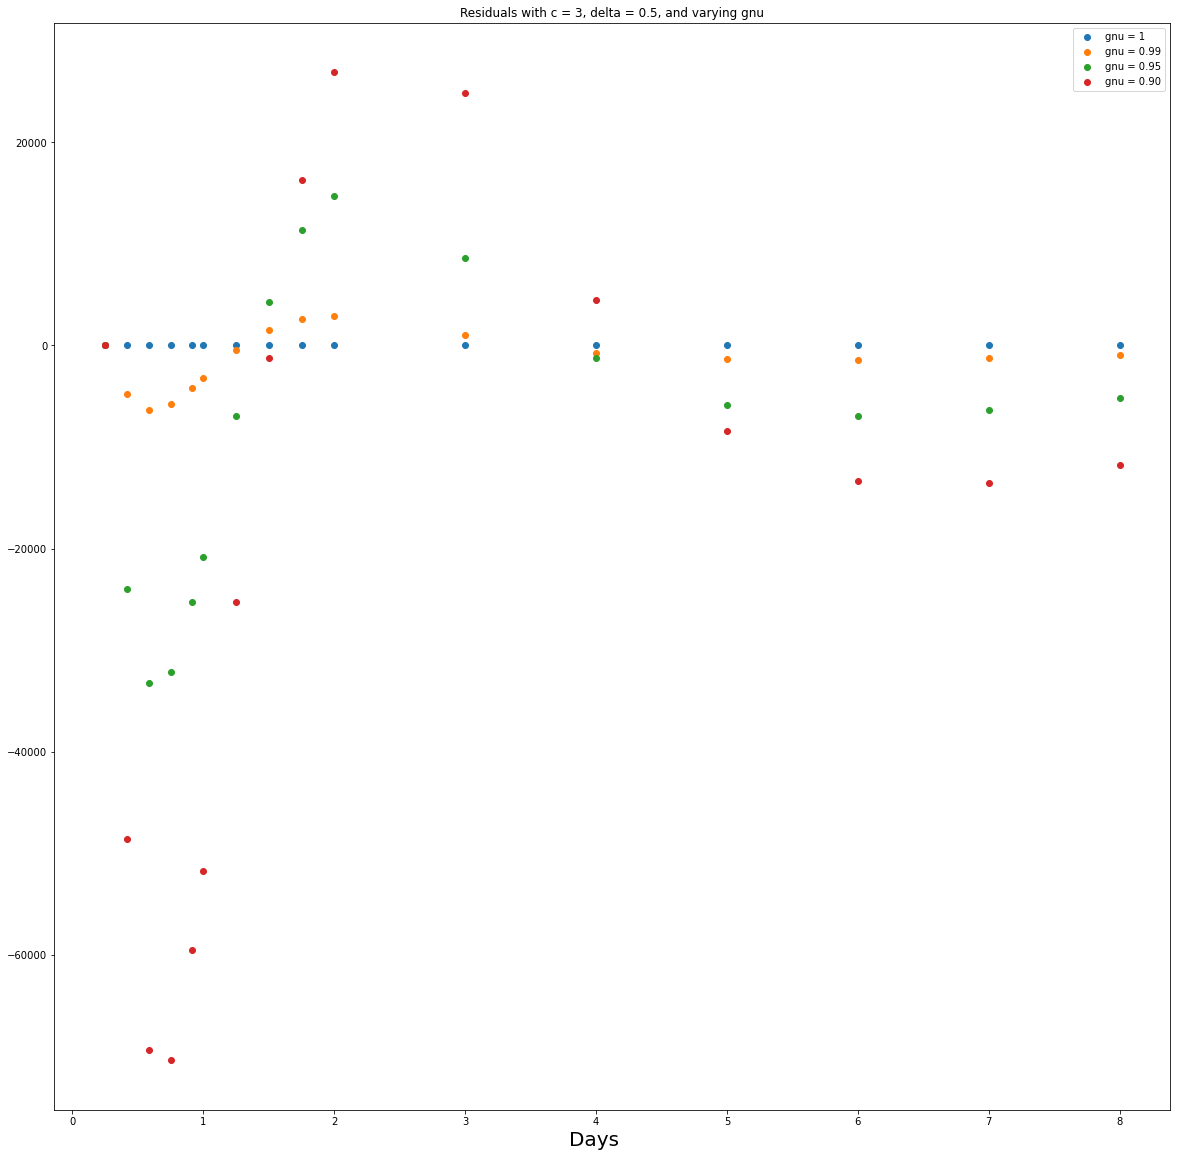

In [70]:
# Answer

fig = plt.figure(figsize = (20,20))
ax1 = plt.scatter(time[1], residuals_1)
ax2 = plt.scatter(time[1], residuals_2)
ax3 = plt.scatter(time[1], residuals_3)
ax4 = plt.scatter(time[1], residuals_4)
plt.title("Residuals with c = 3, delta = 0.5, and varying gnu");
plt.legend(["gnu = 1", "gnu = 0.99", "gnu = 0.95","gnu = 0.90" ]);
fig.text(0.5, 0.1, 'Days', ha='center', fontsize = 20);

The plot above shows that as gnu decreases, variations in the residual values for each day oscillate at a greater amplitude, but in the same sort of sinusoidal decay wave.  It seems that variations occur greatest between (0,1) days, (2,4) days, and (5,8) days. Which fits with the plotted original points and gnu varified measurement points. It seems that the distance from the decrease in gnu underestimates in the first day, overestimates, until the fifth day, and then understimates, but seems to be returning back to the orginal data. We can hypothesize that this pattern continues on. 

### (5) To determine the TCID50 one should estimate an infectivity coefficient.

To calculate the infectivity coefficient, estimate the ratio of $V_I(t=0)$ to the value of TCID50(t=0) for patient 105 from Perelson’s Figure 1. This coefficient acts as a conversion factor between the number of virions in the infectious pool, $V_I$, and the TCID50, and is an indicator of the efficiency of the HIV-1 transmission.

In [62]:
# Answer
#initial VI/TCID = IC as shown in the paper (TCID/ml)  and this value seems to be 1500 therefore VI / IC = TCID and this value can be calculated as such
P1array_T_var_c_t = ([[52000, 3.68, 0.50, 2],[643000, 2.06, 0.53, 11],[77000, 3.09,0.50, 412]])
gnu = ([1, 0.99, 0.95, 0.90])
offset = ([2/24, 6/24, 2/24])
offset2 = ([0, 0, 0])
DV_VT_gnu_c_t, time, VNI_A_gnu_c_t, VI_A_gnu_c_t = deriv_sol_var(P1array_T_var_c_t, offset, gnu);

TCID= DV_VT_gnu_c_t[4][0]/1200
TCID = float(TCID)

IR = np.divide(VI_A_gnu_c_t[4], IN_f)
print("Calculated Infectivity coefficient for patient 105:", IR)

Calculated Infectivity coefficient for patient 105: [1.20000000e+03 8.51281463e+02 6.03900105e+02 4.28407467e+02
 3.03912776e+02 2.55974239e+02 1.52944757e+02 9.13845851e+01
 5.46023442e+01 3.26249334e+01 4.15817741e+00 5.29976236e-01
 6.75475773e-02 8.60920716e-03 1.09727767e-03 1.39852410e-04]


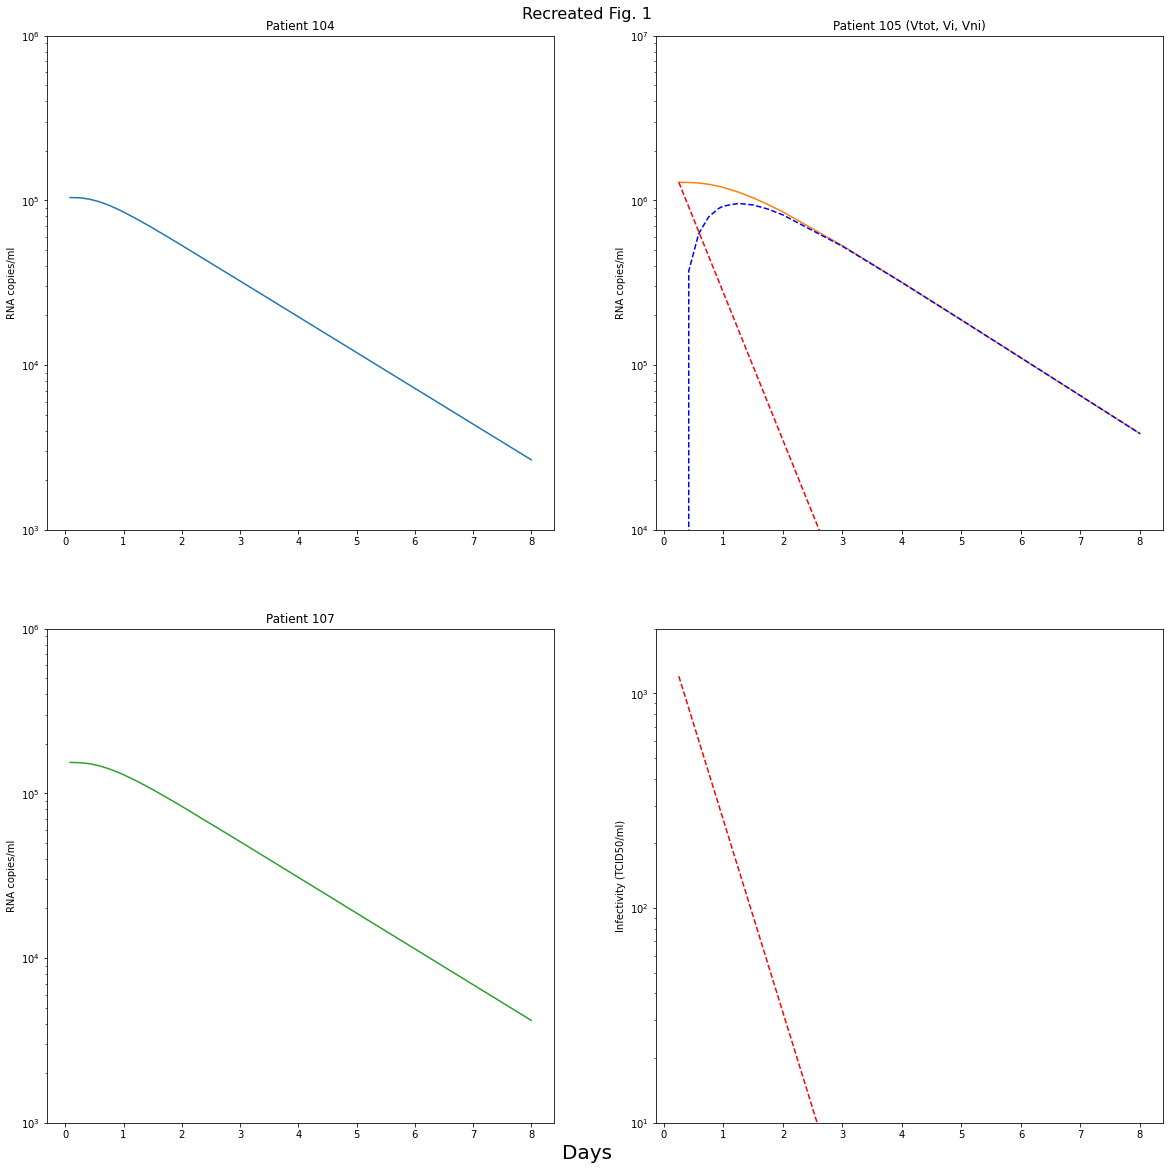

In [69]:


fig, axs = plt.subplots(2,2, figsize = (20,20))
axs[0, 0].plot(time[0], DV_VT_gnu_c_t[0])
axs[0, 0].set_title('Patient 104')
axs[0,0].set_ylabel("RNA copies/ml")
axs[0,0].semilogy()
axs[0,0].set_ylim(10e2, 10e5)

axs[0, 1].plot(time[1], DV_VT_gnu_c_t[4], 'tab:orange')
axs[0, 1].set_title('Patient 105 (Vtot, Vi, Vni)')
axs[0,1].set_ylabel("RNA copies/ml")
axs[0, 1].plot(time[1], VI_A_gnu_c_t[4], 'r--')
axs[0, 1].plot(time[1], VNI_A_gnu_c_t[4], 'b--')
axs[0,1].semilogy()
axs[0,1].set_ylim(10e3, 10e6)

axs[1, 0].plot(time[2], DV_VT_gnu_c_t[8], 'tab:green')
axs[1, 0].set_title('Patient 107')
axs[1,0].set_ylabel("RNA copies/ml")
axs[1,0].semilogy();
axs[1,0].set_ylim(10e2, 10e5)

axs[1, 1].set_title('')
axs[1, 1].plot(time[1], IR, 'r--')
axs[1,1].set_ylabel("Infectivity (TCID50/ml)")
axs[1,1].semilogy()
axs[1,1].set_ylim(10, 20e2)

fig.text(0.5, 0.1, 'Days', ha='center', fontsize = 20)
fig.suptitle('Recreated Fig. 1',x = 0.5, y = 0.9, fontsize=16);


